In [3]:
import pandas as pd
import networkx as nx
df = pd.read_csv('imovirtual_coimbra.csv')
df = df[(df.price < 200_000) & (df.price > 100_000)]


In [135]:
#get the place ['address','location', 'region']
# df['region'] = 
combined = df['address'] + ', ' + df['location'] + ', ' + df['region']
# df.groupby(['region','location', 'address']).count()
combined.unique().values


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [136]:
from geo_utils import  get_lat_long
dict_places = {}
for address in combined.unique():
    
    dict_places[address] = get_lat_long(f'{address}')

In [137]:
len(set(df.address))

181

In [140]:
lat, long = [], []
for k, value in dict_places.items():
    if value is not None:
        lat.append(value[0]), long.append(value[1])
    else:
        print(k)
        
import plotly.express as px

fig = px.scatter_mapbox(pd.DataFrame({'lat': lat, 'long': long}), lat='lat', lon='long')
fig.update_layout(mapbox_style="open-street-map")
fig.show()

Largo de São João - Corujeira , São Martinho do Bispo e Ribeira de Frades,  Coimbra
Rua Doutor Daniel de Matos , Santo António dos Olivais,  Coimbra
Rua da Nogueira - Pé de Cão , São Martinho do Bispo e Ribeira de Frades,  Coimbra
Sem Nome - Tulha , Santa Clara e Castelo Viegas,  Coimbra
Largo Nossa Senhora da Ajuda , Assafarge e Antanhol,  Coimbra
Rotunda dos Combatentes da Grande Guerra , Santo António dos Olivais,  Coimbra
Rua Cabeço do Mato - Logo de Deus , Eiras e São Paulo de Frades,  Coimbra
Rua 1º de Maio - Bairro da Pedrulha , Coimbra (Sé Nova, Santa Cruz, Almedina e São Bartolomeu),  Coimbra
Bairro da Moura - Moura , Santa Clara e Castelo Viegas,  Coimbra
Rua da Pinheirinha , Almalaguês,  Coimbra
Rua da Matugal , Santa Clara e Castelo Viegas,  Coimbra
Coimbra Inovação Parque - Espírito Santo das Touregas , São Martinho do Bispo e Ribeira de Frades,  Coimbra
Largo da Maínça - Mainça , Santo António dos Olivais,  Coimbra
Rua da Escola - Póvoa , São Martinho do Bispo e Ribeira d

In [91]:
from geo_utils import  get_lat_long

origin_coordinates = get_lat_long('Ceira, Coimbra')
polo_I_coordinates = (40.20802283096011, -8.423115320065097)

In [85]:
G = ox.graph_from_point(polo_I_coordinates, dist=20000, network_type='drive')
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)



In [92]:
orig_node = ox.nearest_nodes(G, X=origin_coordinates[1], Y=origin_coordinates[0])
dest_node = ox.nearest_nodes(G, X=polo_I_coordinates[1], Y=polo_I_coordinates[0])
                            
# gets route in meters
pathDistance = nx.shortest_path_length(G, orig_node, dest_node, weight='length')
inv_pathDistance = nx.shortest_path_length(G, dest_node, orig_node, weight='length')


print('pathDistance: ', pathDistance/1_000)
travel_time = nx.shortest_path_length(G, orig_node, dest_node, weight='travel_time')
print((travel_time/60))

pathDistance:  6.512681
7.5466666666666695


In [93]:
inv_pathDistance
travel_time = nx.shortest_path_length(G, dest_node, orig_node, weight='travel_time')
print((travel_time/60))

7.009999999999996


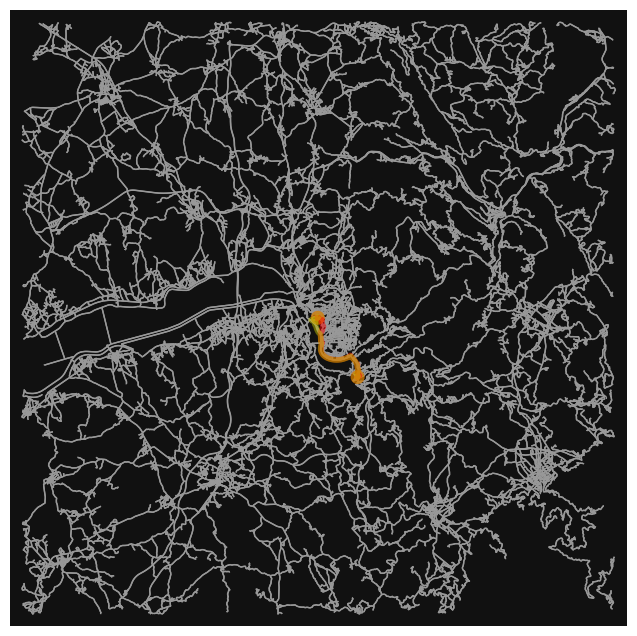

In [95]:
route = nx.shortest_path(G, orig_node, dest_node)
inv_route = nx.shortest_path(G, dest_node, orig_node)

routes = [route, inv_route]
fig, ax = ox.plot_graph_routes(G, routes,route_colors=["r", "y"], route_linewidth=4, node_size=0)


In [116]:
gdf = ox.utils_graph.route_to_gdf(G, route)
# route_time = ox.utils_graph.route_to_gdf(G, route, attribute='travel_time')

# route_travel_time = ox.utils_graph.get_route_edge_attributes(G, route, "length")

# Print the results


# print("Travel Time: {:.2f} seconds".format(sum(route_time)))

6.935955
7.781666666666667


In [106]:
nx.route_through_n(G, route, weight='travel_time')


AttributeError: module 'networkx' has no attribute 'route_through_n'

In [35]:
import osmnx as ox
import taxicab as tc
import matplotlib.pyplot as plt

G = ox.graph_from_point(destination_coordinates, dist=3000, network_type='drive')
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)

orig = origin_coordinates
dest = destination_coordinates

route = tc.distance.shortest_path(G, orig, dest)

fig, ax = tc.plot.plot_graph_route(G, route, node_size=30, show=False, close=False, figsize=(10,10))
padding = 0.001
ax.scatter(orig[1], orig[0], c='lime', s=200, label='orig', marker='x')
ax.scatter(dest[1], dest[0], c='red', s=200, label='dest', marker='x')
ax.set_ylim([min([orig[0], dest[0]])-padding, max([orig[0], dest[0]])+padding])
ax.set_xlim([min([orig[1], dest[1]])-padding, max([orig[1], dest[1]])+padding])
plt.show()

ModuleNotFoundError: No module named 'taxicab'

In [26]:
import osmnx as ox
import networkx as nx

def calculate_driving_distance(origin, destination, network_type='drive'):
    # Create a bounding box from the given coordinates
    graph = ox.graph_from_bbox(
        north=max(origin[0], destination[0]) + 0.1,
        south=min(origin[0], destination[0]) - 0.1,
        east=max(origin[1], destination[1]) + 0.1,
        west=min(origin[1], destination[1]) - 0.1,
        network_type=network_type
    )
    # Download the OSM street network for the bounding box
    # graph = ox.graph_from_bbox(north, south, east, west, network_type=network_type)

    # Find the nearest nodes to the origin and destination
    origin_node = ox.distance.nearest_nodes(graph, origin[0], origin[1])
    destination_node = ox.distance.nearest_nodes(graph, destination[0], destination[1])

    # Print node coordinates for debugging
    print(f"Origin Node: {origin_node}, Coordinates: {graph.nodes[origin_node]['x']}, {graph.nodes[origin_node]['y']}")
    print(f"Destination Node: {destination_node}, Coordinates: {graph.nodes[destination_node]['x']}, {graph.nodes[destination_node]['y']}")

    # Calculate the shortest path
    try:
        route = nx.shortest_path(graph, origin_node, destination_node, weight='length')
        distance = nx.shortest_path_length(graph, origin_node, destination_node, weight='length') / 1000.0  # Convert to kilometers
        return route, distance
    except nx.NetworkXNoPath:
        return None, None

# Replace the coordinates below with your actual origin and destination coordinates
# origin_coordinates = (37.7749, -122.4194)  # San Francisco, CA
# destination_coordinates = (34.0522, -118.2437)  # Los Angeles, CA

route, distance = calculate_driving_distance(origin_coordinates, destination_coordinates)

if route is not None and distance is not None:
    print(f"The driving distance between the two coordinates is {distance:.2f} kilometers.")
    print("The route is:", route)
else:
    print("Unable to calculate driving distance or route.")


Origin Node: 1922083283, Coordinates: -8.3100173, 40.0364977
Destination Node: 1922083283, Coordinates: -8.3100173, 40.0364977
The driving distance between the two coordinates is 0.00 kilometers.
The route is: [1922083283]


40.1725777 40.1356646 -8.3916167 -8.6842162
The driving distance between the two coordinates is 0.00 kilometers.
The route is: [2063467754]


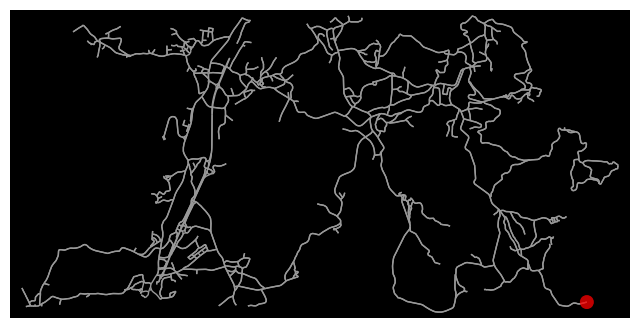

In [34]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt

def calculate_driving_distance(origin, destination, network_type='drive'):
    north, south, east, west = max(origin[0], destination[0]), min(origin[0], destination[0]), max(origin[1], destination[1]), min(origin[1], destination[1])
    print(north, south, east, west)
    graph = ox.graph_from_bbox(north, south, east, west, network_type=network_type)

    origin_node = ox.distance.nearest_nodes(graph, origin[0], origin[1])
    destination_node = ox.distance.nearest_nodes(graph, destination[0], destination[1])

    try:
        route = nx.shortest_path(graph, origin_node, destination_node, weight='length')
        distance = nx.shortest_path_length(graph, origin_node, destination_node, weight='length') / 1000.0
        return route, distance
    except nx.NetworkXNoPath:
        return None, None

def plot_route(graph, route, origin, destination):
    fig, ax = ox.plot_graph_route(graph, route, route_linewidth=6, node_size=0, bgcolor='k', route_color='r')

    # Plot the origin and destination points
    # ax.scatter(*origin, color='g', s=100, label='Origin')
    # ax.scatter(*destination, color='b', s=100, label='Destination')

    # plt.legend()
    # plt.show()

if __name__ == "__main__":
    origin_coordinates      = (40.1356646, -8.3916167)
    destination_coordinates = (40.1725777, -8.6842162)

    route, distance = calculate_driving_distance(origin_coordinates, destination_coordinates)

    if route is not None and distance is not None:
        print(f"The driving distance between the two coordinates is {distance:.2f} kilometers.")
        print("The route is:", route)

        # Plot the route on the graph
        north, south, east, west = max(origin_coordinates[0], destination_coordinates[0]), min(origin_coordinates[0], destination_coordinates[0]), max(origin_coordinates[1], destination_coordinates[1]), min(origin_coordinates[1], destination_coordinates[1])
        graph = ox.graph_from_bbox(north, south, east, west, network_type='drive')
        plot_route(graph, route, origin_coordinates, destination_coordinates)
    else:
        print("Unable to calculate driving distance or route.")
